In [1]:
# importing tool functions
import numpy as np
import matplotlib.pyplot as plt
from tools import utils, ml_tools
import pandas as pd
import numpy as np

In [2]:
# machine learning imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from sklearn.preprocessing import LabelBinarizer
from keras.utils import np_utils

In [19]:
# graphing tools
import seaborn as sns
from scipy.stats import sem
import matplotlib
import scienceplots

plt.style.use(['science', 'ieee','no-latex'])
matplotlib.rc('font', family='times new roman')

# time
import time 

In [4]:
dir_name_e = r'C:\Users\EfiaA\OneDrive - Imperial College London\Imperial academic work\University life\Y4\MSci project\Project_Coding\nlp-physicseducation\Pickledfiles'

# Year 1 & 2 Data

### 1. Import the year 1 & 2 Data

In [5]:
# import the yr2 labels
dir_csv3 = 'outputs/labels_cleaned_y1y2.csv'
df3 = pd.read_csv(dir_csv3, encoding='utf-8')

### 1.1 Apply TF-IDF on year 1 & 2 Data

In [6]:
# Epistemology (Reasoning Level)

# X_data -> Content of Lab report
X_y1y2_tf_rl             = np.array(ml_tools.tf_idf(df3['Content'].tolist()), dtype = object) # object
X_y1y2_tf_rl               = X_y1y2_tf_rl [1]

# y_data ->  Epistemology label 
y_y1y2_tf_rl = df3['ReasoningLevel'].tolist() # list
lb           = LabelBinarizer()
lb.fit(y_y1y2_tf_rl )
y_y1y2_tf_rl  = lb.transform(y_y1y2_tf_rl )


In [7]:
# Argument Level

# X_data -> same as above
X_y1y2_tf_al               = X_y1y2_tf_rl [1]

# y_data -> argument level
y_y1y2_tf_al = np.array(df3['ArgumentLevel'].tolist(), dtype = object)
lb = LabelBinarizer()
lb.fit(y_y1y2_tf_al)
y_y1y2_tf_al= lb.transform(y_y1y2_tf_al)



### 1.2 Apply BOW on year 1 & 2 Data

In [8]:
# Epistemology (Reasoning Level)

# X_data -> Content of Lab report 
wordvec_names, X_y1y2_bow_rl = ml_tools.BoW(df3['Content'].tolist())

# y_data -> Epistemology label 
y_y1y2_bow_rl = df3['ReasoningLevel'].tolist()
lb = LabelBinarizer()
lb.fit(y_y1y2_bow_rl )
y_y1y2_bow_rl  = lb.transform(y_y1y2_bow_rl )

In [9]:
# Argument Level

# X_data -> Content of Lab report 
X_y1y2_bow_al       = X_y1y2_bow_rl

# y_data -> Argument level labels 
y_y1y2_bow_al      = df3['ArgumentLevel'].tolist()
lb                 = LabelBinarizer()
lb.fit(y_y1y2_bow_al)
y_y1y2_bow_al      = lb.transform(y_y1y2_bow_al)

# Neural Network Function

In [119]:
# Standard Neural Network

def NN(model1, input1, ephs, X_t, y_t, X_test, y_test):
    maxlen = 100 
    model = model1
    model.add(layers.Dense(12, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(8, input_dim = input, activation  = 'relu'))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    model.add(layers.Flatten())
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
    model.build(input1)
    model.summary()
    history = model.fit(X_t,y_t,epochs = ephs, verbose=True, validation_data=(X_test, y_test), batch_size=30 )
    return history


def NN_dataframe(X, y, epoch_no, tratio):
    accuracies = []
    accuracies_std = []
    loss = []
    dummy = []
    dummy_loss = []
    start_time = time.time()
    print(start_time)
   
    X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = tratio)
    input = X_train_b.shape[1]
    nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
    dummy.append(nn1.history['accuracy'])
    loss.append(nn1.history['loss'])

    dictionary = {'accuracy':dummy, 'loss':loss}
    Dataframe = pd.DataFrame(dictionary)
    totaltime = time.time() - start_time
    return Dataframe


def NN_data(X, y,t_size,epoch_no):
    accuracies = []
    accuracies_sem = []
    dummy = []
    for i in t_size:
        X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y , train_size = i)
        input = X_train_b.shape[1]
        #input = len(y_train_b)
        nn1 = NN(Sequential(), input, epoch_no, X_train_b, y_train_b, X_test_b, y_test_b)
        dummy.append(nn1.history['accuracy'])

    for array in dummy:
        accuracies.append(np.sum(array)/len(array))
        accuracies_sem.append(sem(array))

    dict_rl = {'trainsize':t_size, 'accuracy':accuracies, 'sem': accuracies_sem}
    acc_rl_bow = pd.DataFrame(dict_rl)
    #utils.save_as_pickle_file(acc_rl_bow,'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year), dir)
    #name = 'NN_{}_{}_trainsize_accuracy_sem_{}ephs_{}'. format(str_dataname,str_featext,'1000', str_year)
    return acc_rl_bow

def plot(dframe_train, dframe_acc, dframe_sem):
    plt.plot(dframe_train, dframe_acc, 'o')
    plt.errorbar(dframe_train, dframe_acc, yerr = dframe_sem, markersize=0.5, capsize=3, elinewidth=1, color= 'black' )
    plt.xlabel(' Training size')
    plt.ylabel('Accuracy score')

    # save figure 
    # filepath = 'outputs/NN-RL-BOW-1000ephs_NEW'
    # plt.savefig(filepath)
    return




## 2.1 Epistomology - BOW 

In [122]:
# train and split the data
# Choose a 0.7 train size
# 500 ephs
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_y1y2_tf_rl, y_y1y2_tf_rl , train_size = 0.7)
input = X_train_t.shape[1]
print(input)




7563


In [124]:
ephs = 1000
train_sizes = [0.5,0.6,0.7,0.8,0.9] 
Epist_data_bow_rl = NN_data(X_y1y2_tf_rl, y_y1y2_tf_rl,train_sizes,ephs)

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_67 (Dense)            (None, 12)                90768     
                                                                 
 dense_68 (Dense)            (None, 8)                 104       
                                                                 
 dense_69 (Dense)            (None, 1)                 9         
                                                                 
 flatten_23 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
3/3 [==============================] - 1s 125ms/step - loss: 0.6811 - accuracy: 0.7500 - val_loss: 0.6712 - val_accuracy: 0.7500
Epoch 2/100
3/3 [=======================

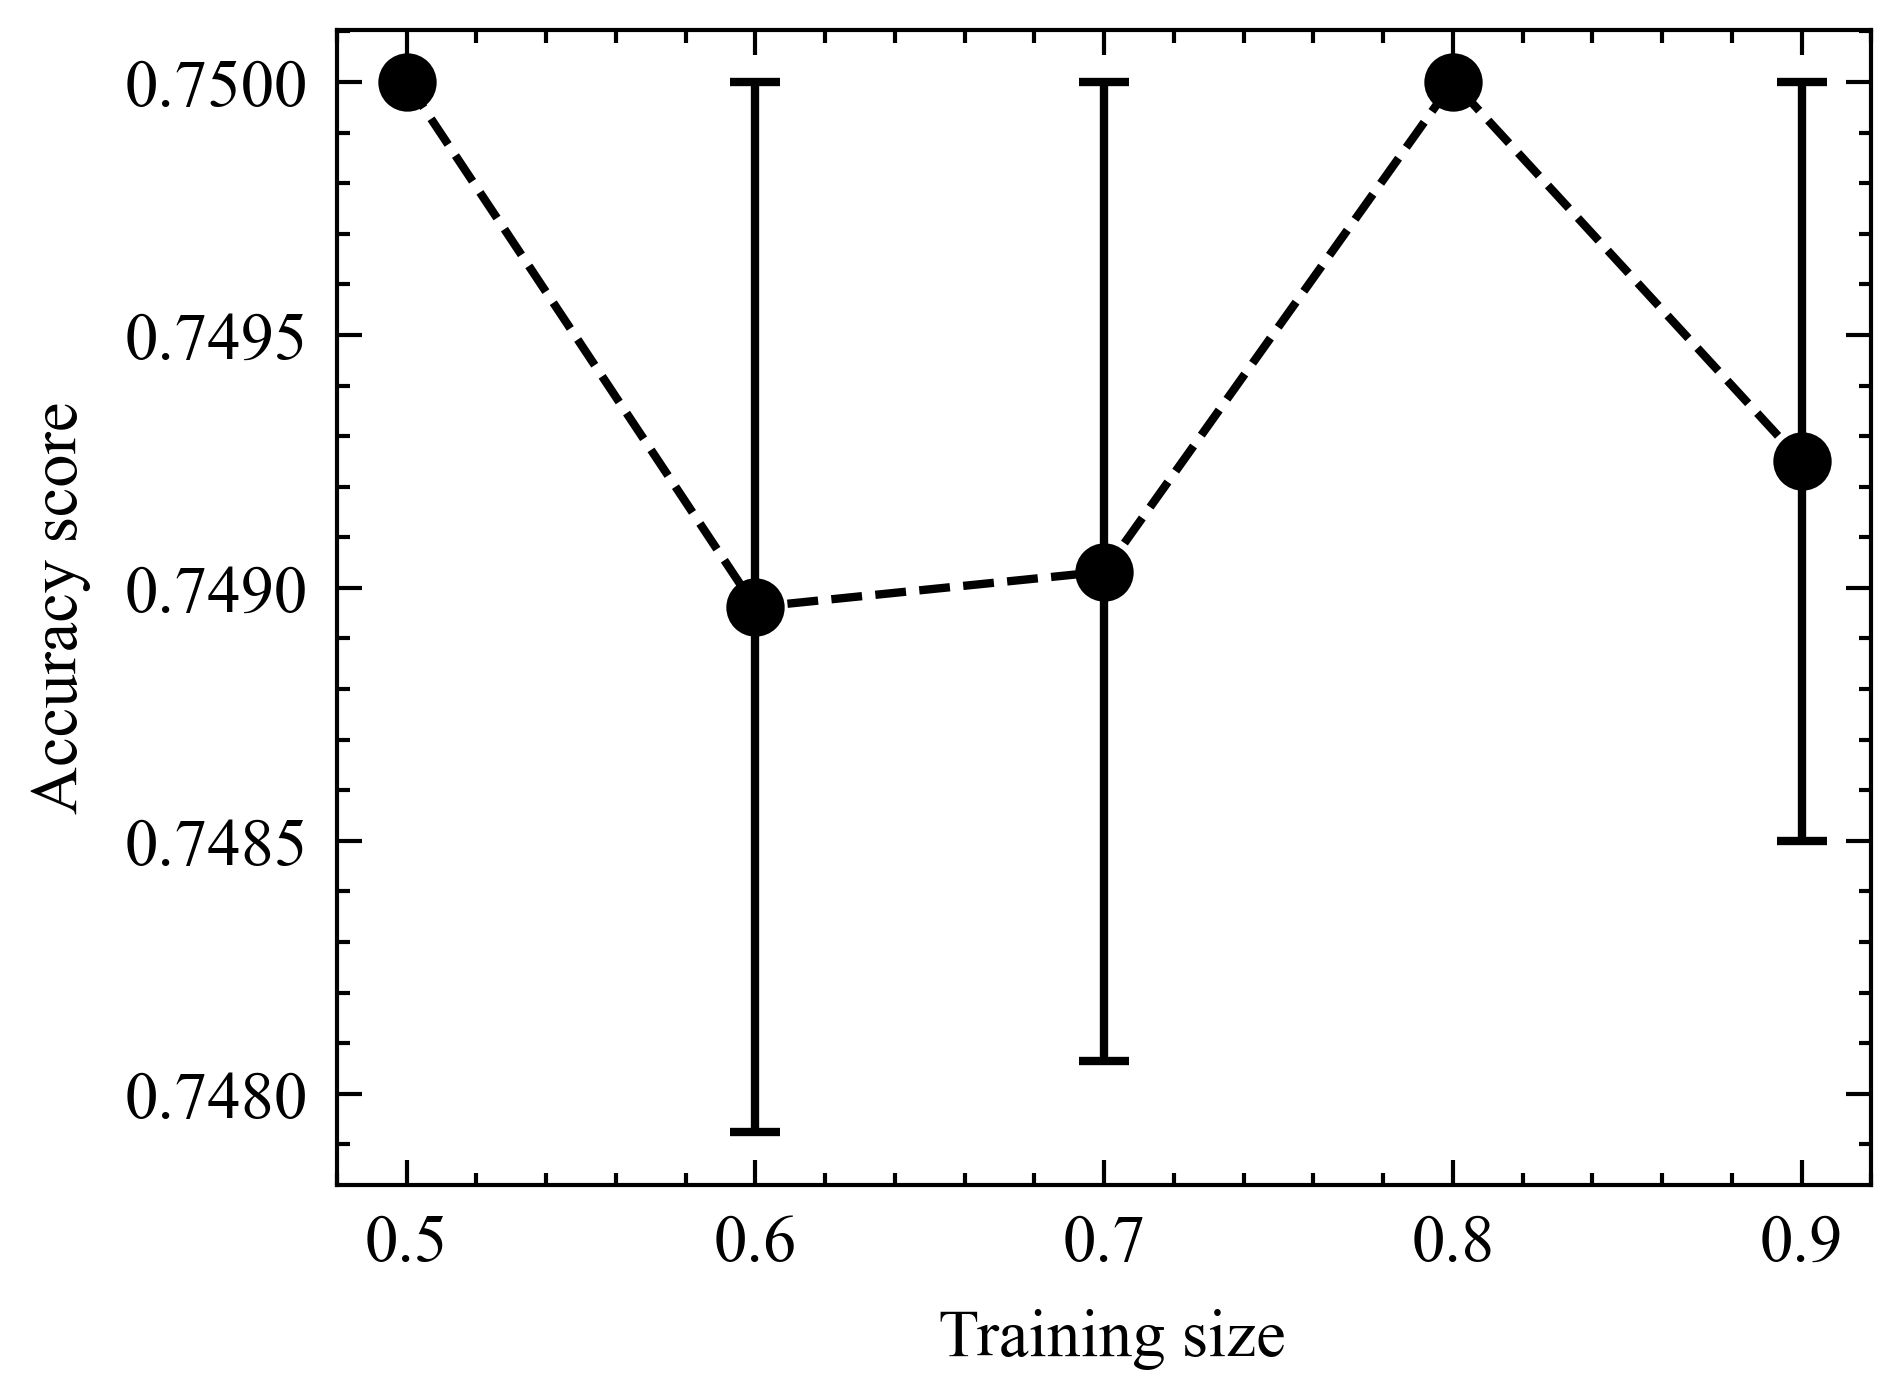

In [125]:
plot(Epist_data_bow_rl['trainsize'], Epist_data_bow_rl['accuracy'], Epist_data_bow_rl['sem'])

In [116]:

Epist_nn_bow_train  = NN(Sequential(), input, ephs, X_train_t, y_train_t, X_test_t, y_test_t)[0]

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_49 (Dense)            (None, 12)                90768     
                                                                 
 dense_50 (Dense)            (None, 8)                 104       
                                                                 
 dense_51 (Dense)            (None, 1)                 9         
                                                                 
 flatten_17 (Flatten)        (None, 1)                 0         
                                                                 
Total params: 90,881
Trainable params: 90,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 1s 55ms/step - loss: 0.6939 - accuracy: 0.5040 - val_loss: 0.6871 - val_accuracy: 0.7500
Epoch 2/100
5/5 [========================

TypeError: 'History' object is not subscriptable

In [108]:
# --- getting the accuracy values ----
acc = Epist_nn_bow_train.history['accuracy']
std = np.std(acc)
print(std)
print('time', Epist_nn_bow_train )

0.007221682054711389


<ErrorbarContainer object of 3 artists>

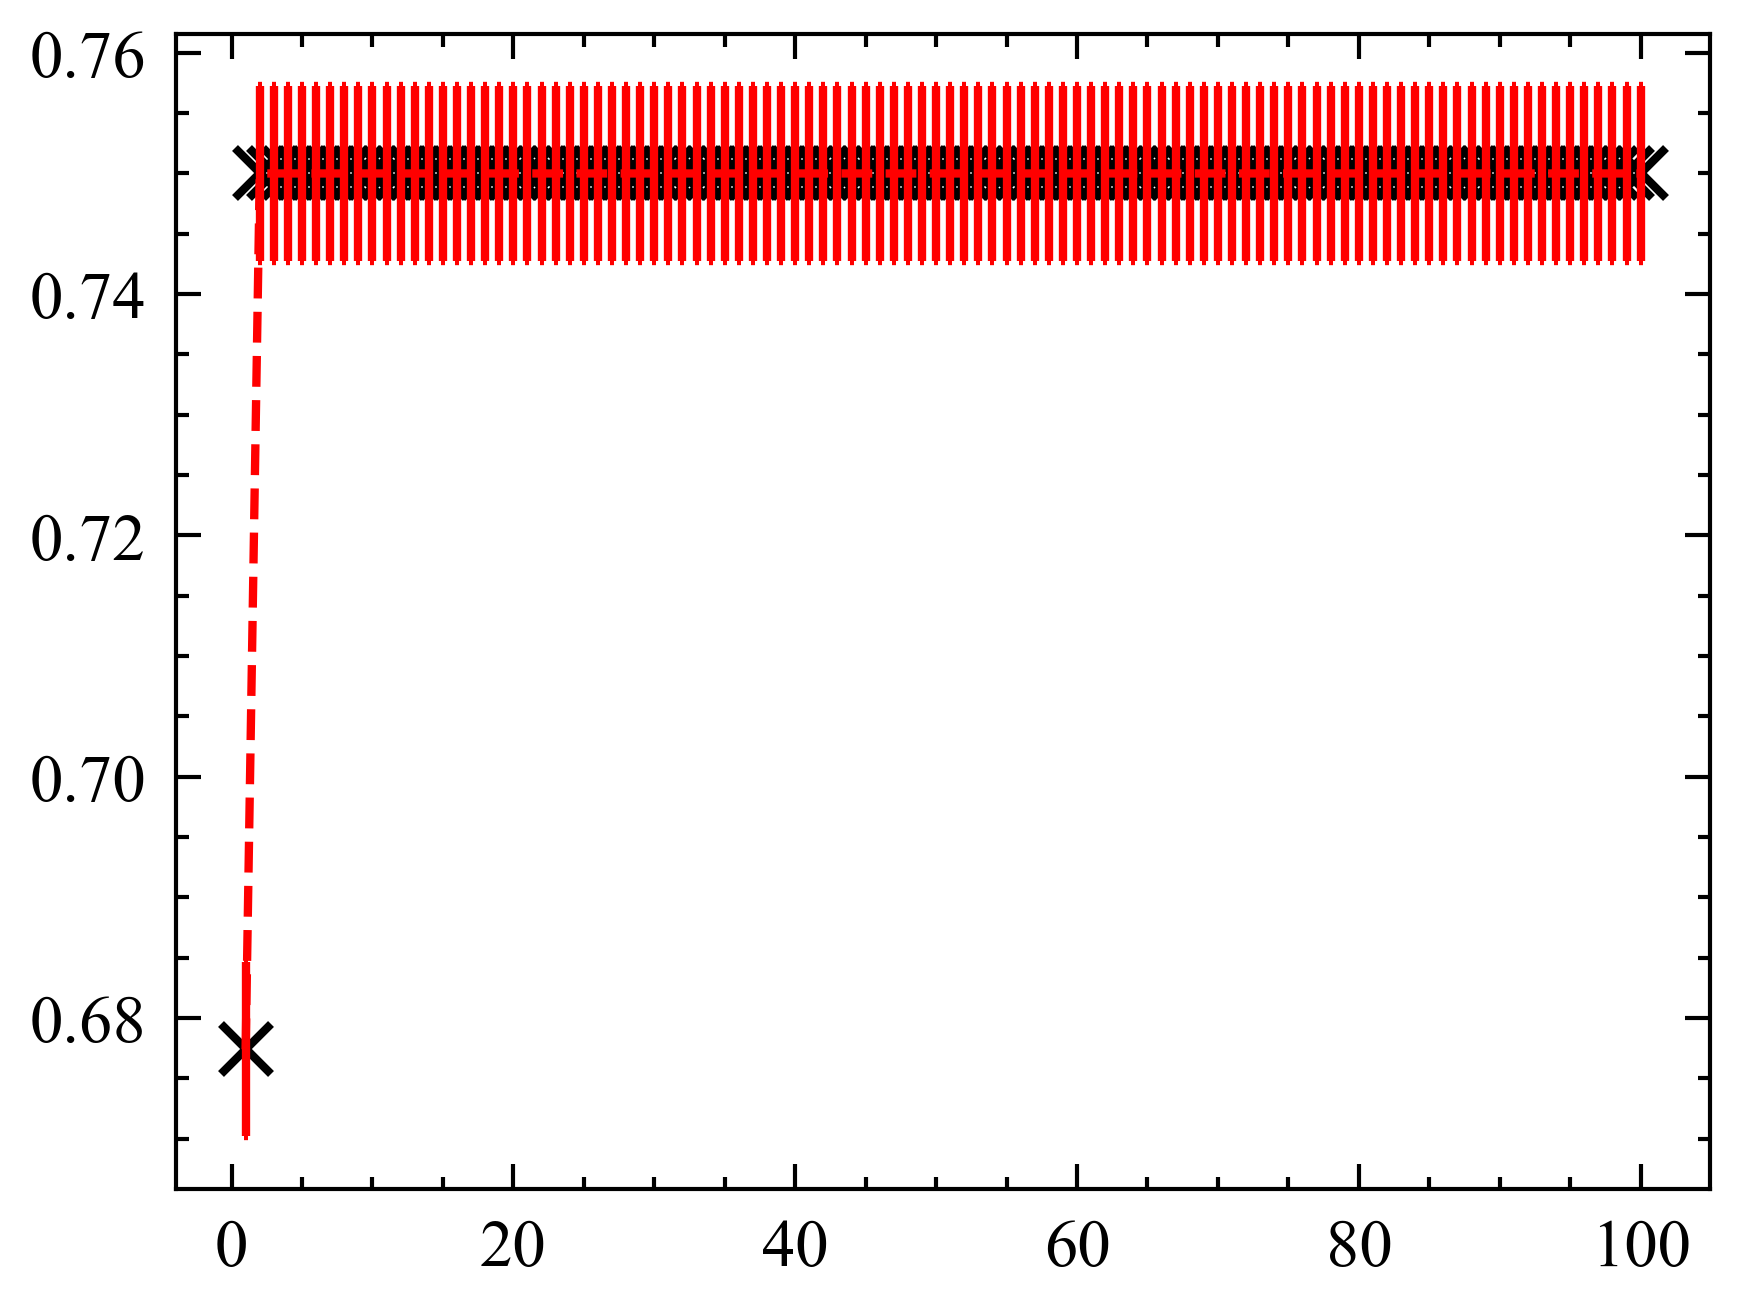

In [113]:
x = np.linspace(1,ephs,ephs)
plt.plot(x, acc,'x')
plt.errorbar(x, acc, yerr=std, capsize=0.2, markersize = 0.1)